In [2]:
import numpy as np
import tensorflow as tf # You may need to "pip3 install tensorflow"
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt

# load data and split into training and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#if you are having trouble directly downloading the dataset, download the mnist.npz file and uncomment lines below
#def load_data(path):
#    with np.load(path) as f:
#        x_train, y_train = f['x_train'], f['y_train']
#        x_test, y_test = f['x_test'], f['y_test']
#        return (x_train, y_train), (x_test, y_test)
#(x_train, y_train), (x_test, y_test) = load_data('mnist.npz')

x_train = x_train.astype(float)
y_train = y_train.astype(float)
x_test = x_test.astype(float)
y_test = y_test.astype(float)

# note x_train is a numpy array with size (60000, 28 28)
print(np.shape(x_train))
print(np.shape(x_test))

# for this assignment, only use the first 2000 training examples
x_train = x_train[0:2000,:,:]
y_train = y_train[0:2000]

(60000, 28, 28)
(10000, 28, 28)


# Problem #1
For this problem, I'll assume the 18th image refers to the image at index 17, since python starts counting the first image at 0. To be certain, as I normally count starting with 0, I'll also plt.imshow the image at index 18 as well.

The 18th image (index 17) has digit: 8

The image at index 18 has digit: 6

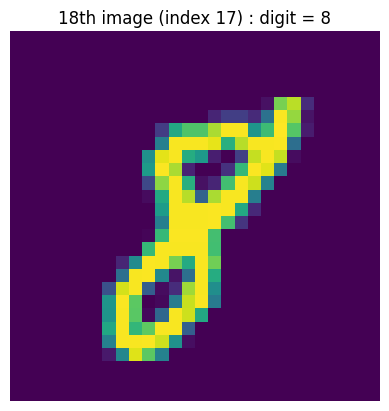

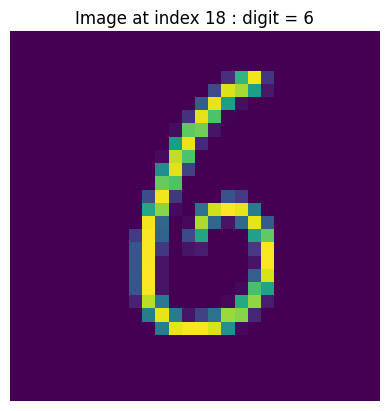

In [6]:
# Prob. 1
# note that you can access the ith image in x_train as x_train[i-1,:,:]
# use plt.imshow(the_image, cmap=plt.cm.gray_r) to display image

plt.axis('off')
plt.imshow(x_train[17])
plt.title(f"18th image (index 17) : digit = {int(y_train[17])}")
plt.show()

plt.axis('off')
plt.imshow(x_train[18])
plt.title(f"Image at index 18 : digit = {int(y_train[18])}")
plt.show()

# Problem 2
For this problem, I used plt.subplots to display a grid of images along with its label.

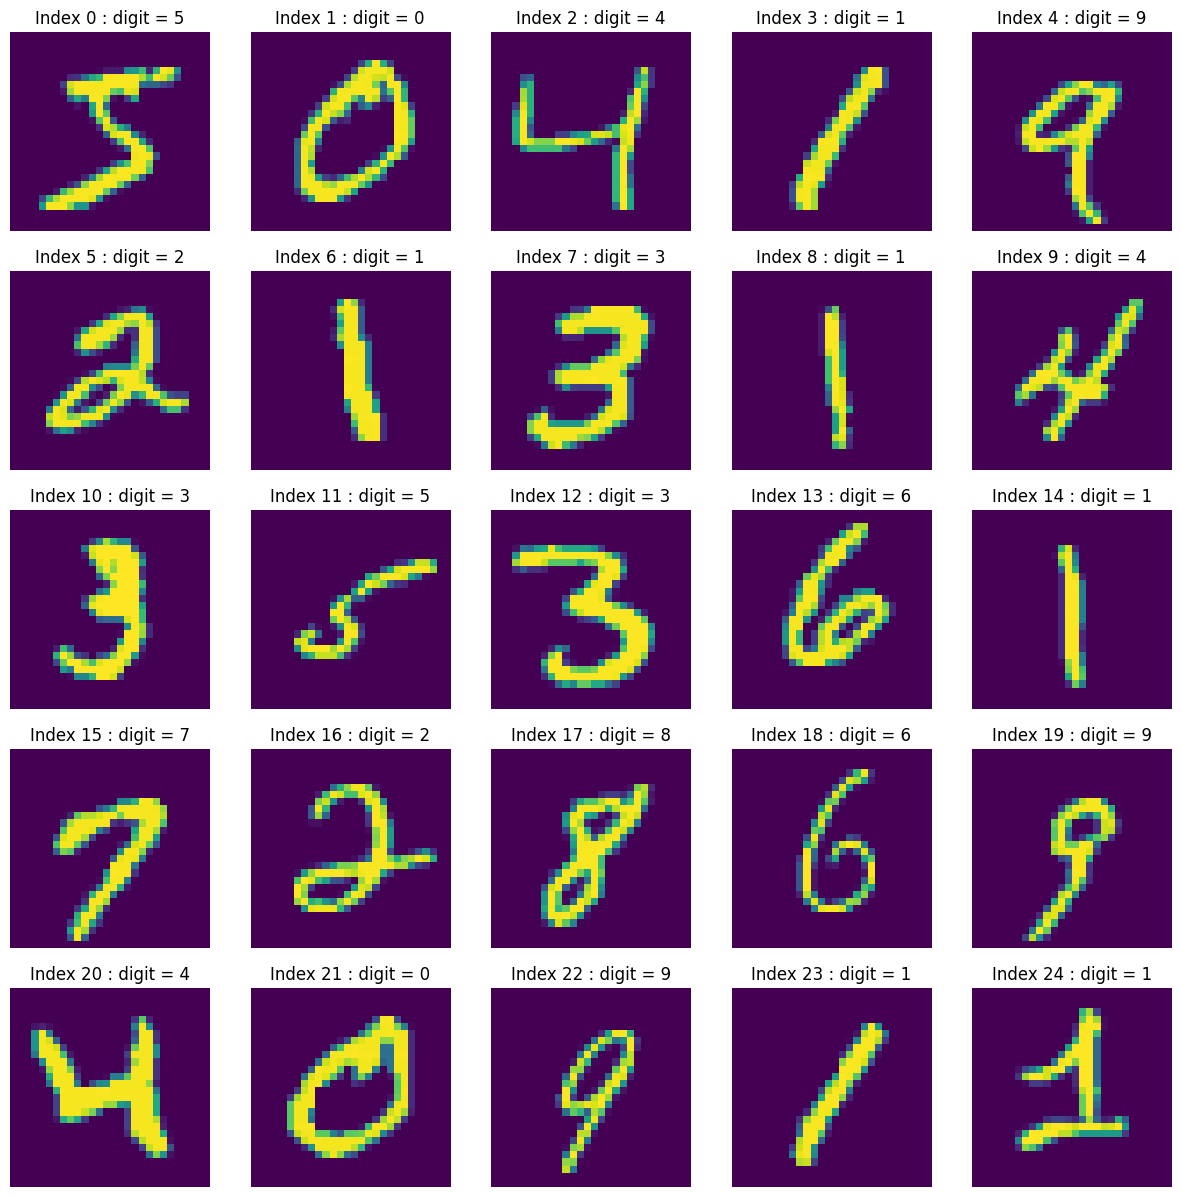

In [12]:
# Prob. 2

fig, ax = plt.subplots(5,5, figsize=(15,15))
for i in range(5):
    for j in range(5):
        ax[i,j].axis('off')
        ax[i,j].imshow(x_train[5*i+j])
        ax[i,j].set_title(f"Index {5*i+j} : digit = {int(y_train[5*i+j])}")
plt.show()

# Problem 3

In [22]:
# Prob 3a

## nearest neighbor classifier
def f(_x):
    assert np.shape(_x)==np.shape(x_train[0]) # check to make sure input is a single 28x28 np array
    ### write code here to compute the index of the nearest neighbor 
    # step 1 - compute the pixelwise distance to all images
    dist = x_train-np.expand_dims(_x, 0)
    # step 2 - compute the l2 norm (sum of squares)
    l2_normed_dist = np.sum(dist**2, axis=(1,2))
    # step 3 - compute the nearest neighbor index
    nearest_neighbor = np.argmin(l2_normed_dist)
    
    return (y_train[nearest_neighbor], nearest_neighbor)  # return the label of the nearest neighbor, and index

Actual class is 7.0
Predicted class is 7.0
Misclassification Loss: 0.0
Square Error Loss: 0.0


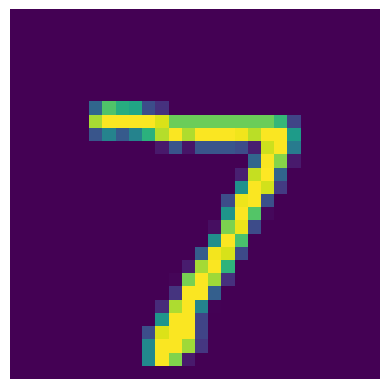

In [38]:
# Prob 3b

#vectorized loss functions
def misclassification_loss(true : np.array, pred: np.array)->np.array:
    return np.array(true!=pred).astype(float)
def squared_error_loss(true : np.array, pred: np.array)->np.array:
    return np.array(true-pred)**2

#first image
x_true = x_test[0]
y_true = y_test[0]
y_pred, index = f(x_true)
print(f"Actual class is {y_true}")
print(f"Predicted class is {y_pred}")
print(f"Misclassification Loss: {misclassification_loss(y_true, y_pred)}")
print(f"Square Error Loss: {squared_error_loss(y_true, y_pred)}")
plt.imshow(x_true)
plt.axis('off')
plt.show()

evaluating: 100%|████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 142.40it/s]


Emprical Risk (Misclassification Loss): 0.127
Emprical Risk (Square Error Loss): 2.103


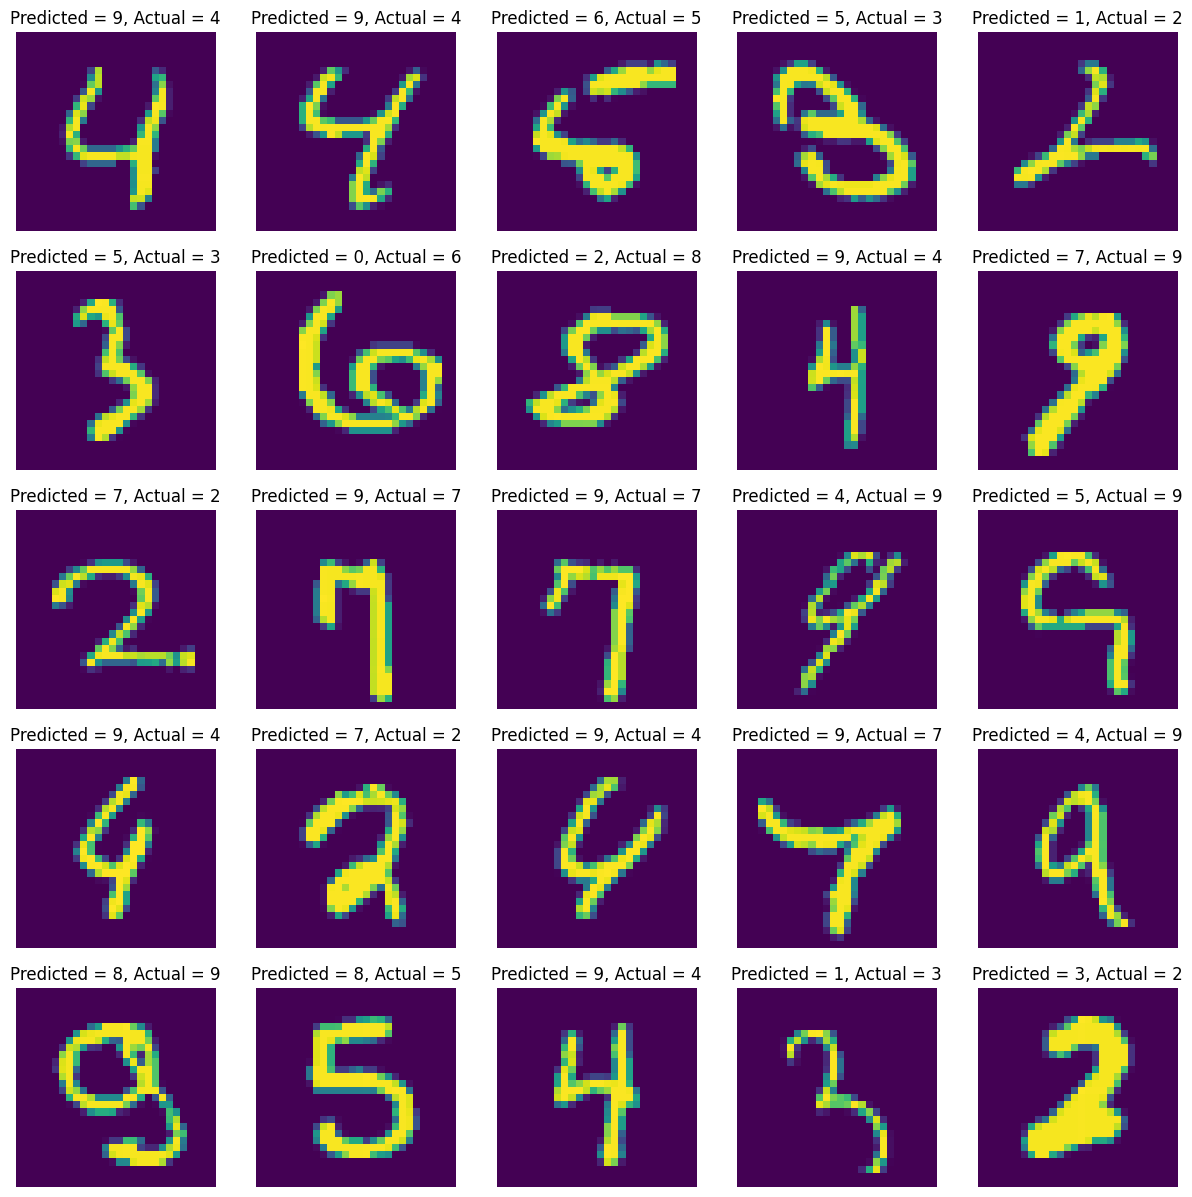

In [56]:
# Prob 3c & 3d

#3c
from tqdm import tqdm # imported progress bar to cure my crippling ADHD
y_pred, indices = np.array([f(x_true) for x_true in tqdm(x_test[0:1000], desc="evaluating")]).T
y_true = y_test[0:1000]
print(f"Emprical Risk (Misclassification Loss): {np.mean(misclassification_loss(y_true, y_pred))}")
print(f"Emprical Risk (Square Error Loss): {np.mean(squared_error_loss(y_true, y_pred))}")

#3d
incorrectly_classified = np.where(y_pred!=y_true)[0]
fig, ax = plt.subplots(5,5, figsize=(15,15))
for i in range(5):
    for j in range(5):
        test_index = incorrectly_classified[5*i+j]
        nearest_train_index = indices[test_index]
        ax[i,j].axis('off')
        ax[i,j].imshow(x_test[test_index])
        ax[i,j].set_title(f"Predicted = {int(y_pred[test_index])}, Actual = {int(y_true[test_index])}")
plt.show()

evaluating: 100%|████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 223.73it/s]


Emprical Risk (Misclassification Loss): 0.135
Emprical Risk (Square Error Loss): 2.409


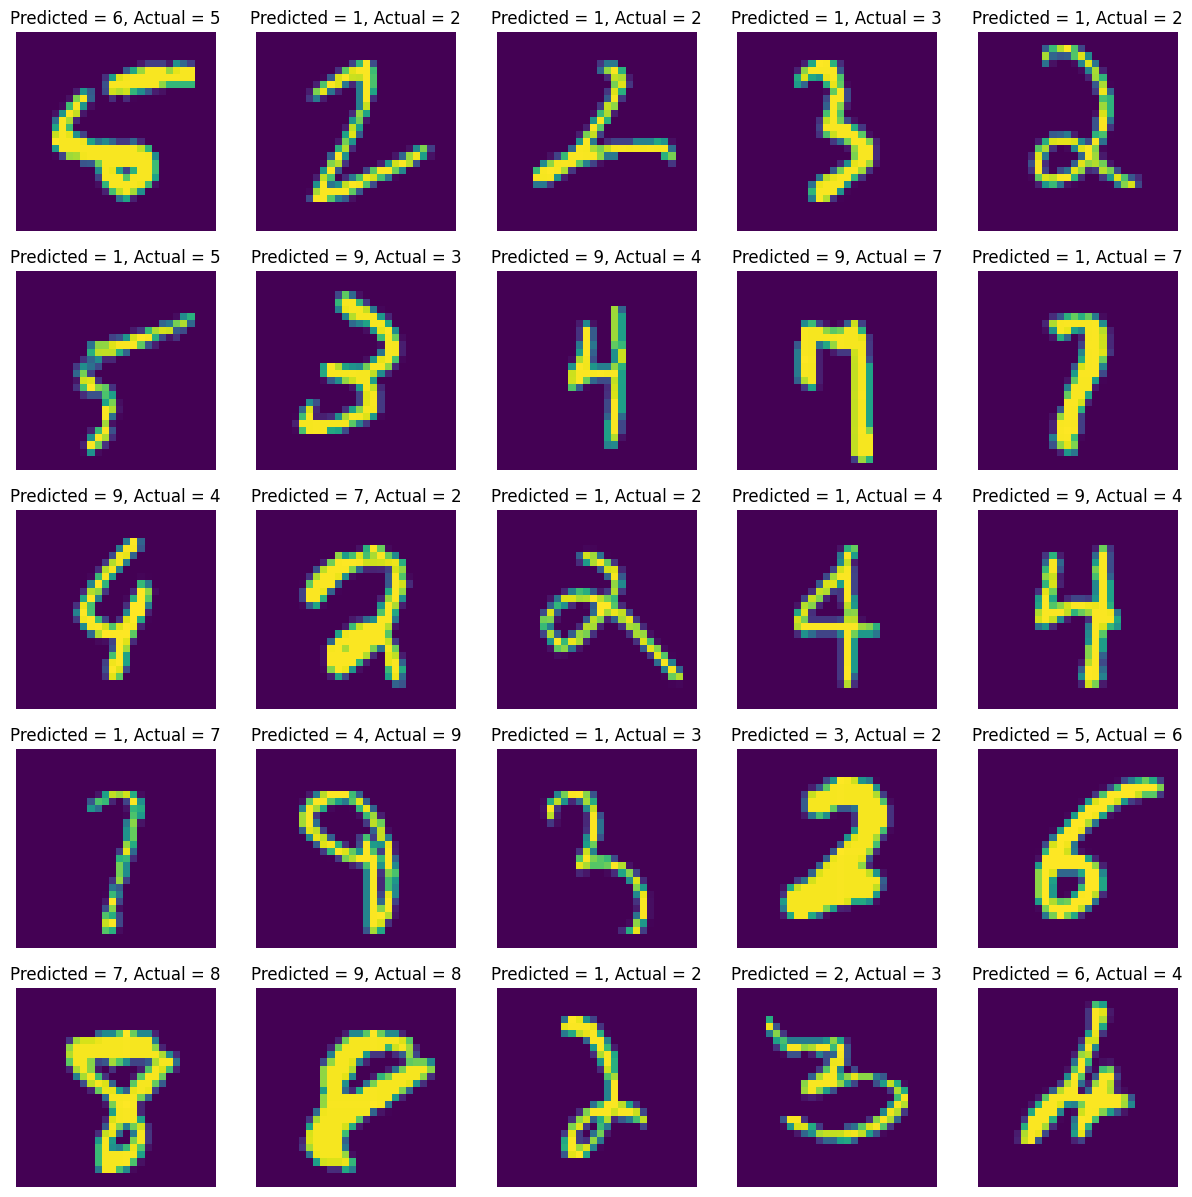

In [99]:
# Prob 4 (optional KNN)

## k - nearest neighbor classifier
def f_knn(_x, k):
    assert np.shape(_x)==np.shape(x_train[0]) # check to make sure input is a single 28x28 np array
    # step 1 - compute the pixelwise distance to all images
    dist = x_train-np.expand_dims(_x, 0)
    # step 2 - compute the l2 norm (sum of squares)
    l2_normed_dist = np.sum(dist**2, axis=(1,2))
    # step 3 - compute the k - nearest neighbor index
    k_nearest_neighbors_index = np.argsort(l2_normed_dist)[:k]
    return y_train[k_nearest_neighbors_index], k_nearest_neighbors_index

# vote algorithm
def vote(k_nearest_neighbors):
    freqs = {i:[] for i in range(10)}
    for i, num in enumerate(k_nearest_neighbors):
        freqs[num].append(i)
    voted = 0
    count = len(freqs[0])
    for i in range(1,10):
        if len(freqs[i])==0:
            continue
        # more appearance - set as voted
        if len(freqs[i])>count:
            voted = i
            count = len(freqs[i])
        # same appearance - consider the closest neighbor
        elif len(freqs[i])==count:
            if freqs[voted][0]>freqs[i][0]:
                voted = i
                count = len(freqs[i])
        else:
            continue
    return voted

k = 10
y_pred = np.array([vote(f_knn(x_true, k)[0]) for x_true in tqdm(x_test[0:1000], desc="evaluating")]).T
y_true = y_test[0:1000]
print(f"Emprical Risk (Misclassification Loss): {np.mean(misclassification_loss(y_true, y_pred))}")
print(f"Emprical Risk (Square Error Loss): {np.mean(squared_error_loss(y_true, y_pred))}")

# misclassification
incorrectly_classified = np.where(y_pred!=y_true)[0]
fig, ax = plt.subplots(5,5, figsize=(15,15))
for i in range(5):
    for j in range(5):
        test_index = incorrectly_classified[5*i+j]
        nearest_train_index = indices[test_index]
        ax[i,j].axis('off')
        ax[i,j].imshow(x_test[test_index])
        ax[i,j].set_title(f"Predicted = {int(y_pred[test_index])}, Actual = {int(y_true[test_index])}")
plt.show()